In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/classification_randomforests_Ex1.csv')
df

cid   R   F           M customer_value
0          1069  19   4   486.00000              M
1          1113  54   4   557.50000              M
2          1250  19   2   791.50000              M
3          1359  87   1   364.00000              L
4          1823  36   3   869.00000              M
...         ...  ..  ..         ...            ...
32261   2179544   1   1  3753.00000              M
32262   2179568   1   1   406.00000              L
32263   2179605   1   1  6001.00000              M
32264   2179643   1   1   887.00000              L
32265  20002000  24  27  1814.62963              H

[32266 rows x 5 columns]

In [ ]:
CustomerData = df[['R', 'F', 'M']]
CustomerData.head()  #head()功能是顯示前五筆資料

R  F      M
0  19  4  486.0
1  54  4  557.5
2  19  2  791.5
3  87  1  364.0
4  36  3  869.0

In [ ]:
CustomerTagret = df['customer_value']
CustomerTagret[:5]

0    M
1    M
2    M
3    L
4    M
Name: customer_value, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    CustomerData,
    CustomerTagret,
    train_size = 0.75,
    stratify = CustomerTagret,
    random_state = 42
)

print("X_train: {:.0f}".format(len(X_train)))
print("X_test: {:.0f}".format(len(X_test)))
print("y_train: {:.0f}".format(len(y_train)))
print("y_test: {:.0f}".format(len(y_test)))

X_train: 24199
X_test: 8067
y_train: 24199
y_test: 8067


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
myRFC = RandomForestClassifier(n_estimators = 150, criterion = 'gini')
myRFC

RandomForestClassifier(n_estimators=150)

In [ ]:
myRFC.fit(X_train, y_train)
myRFC

RandomForestClassifier(n_estimators=150)

In [ ]:
y_rfc_pred = myRFC.predict(X_test)
y_rfc_pred

array(['H', 'H', 'L', ..., 'L', 'L', 'H'], dtype=object)

In [ ]:
from sklearn import metrics

In [ ]:
acc_rfc = metrics.accuracy_score(y_test, y_rfc_pred)
print("Accuracy: {:.2f}".format(acc_rfc))

Accuracy: 0.89


In [ ]:
mycm_rfc = metrics.confusion_matrix(y_test, y_rfc_pred)
print('Confusion Matrix: \n', mycm_rfc)

Confusion Matrix: 
 [[2522    0  201]
 [   0 2262  240]
 [ 253  184 2405]]


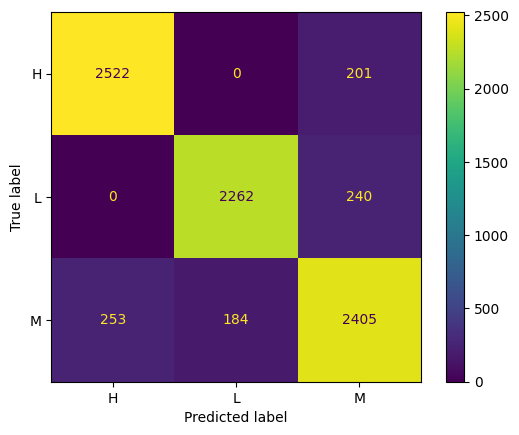

In [ ]:
metrics.ConfusionMatrixDisplay(confusion_matrix = mycm_rfc, display_labels = myRFC.classes_).plot()

In [ ]:
newdata = [[5.0, 2.0, 2100], [1.0, 6.0, 5000]]
print(newdata)
y_newpred_rfc_c = myRFC.predict(newdata)
print(y_newpred_rfc_c)

[[5.0, 2.0, 2100], [1.0, 6.0, 5000]]
['M' 'H']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#!nvidia-smi